# Dogs of New York
Source & Data Dictionary: https://data.cityofnewyork.us/Health/NYC-Dog-Licensing-Dataset/nu7n-tubp

**There are ~122,000 registered dogs in New York**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/rspd/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
dogs = pd.read_csv("https://data.cityofnewyork.us/api/views/nu7n-tubp/rows.csv")
dogs.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate
0,1753,SHADOW,M,01/01/2000 12:00:00 AM,Beagle,Brooklyn,11236.0,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/2014,01/30/2016
1,2415,ROCCO,M,10/01/2011 12:00:00 AM,Boxer,Brooklyn,11210.0,314.0,756.0,BK43,45.0,9.0,17.0,01/07/2015,01/30/2016
2,3328,LUIGI,M,09/01/2005 12:00:00 AM,Maltese,Bronx,10464.0,210.0,516.0,BX10,13.0,14.0,34.0,01/17/2015,02/02/2016
3,7537,PETUNIA,F,08/01/2013 12:00:00 AM,Pug,Brooklyn,11221.0,304.0,419.0,BK78,34.0,7.0,18.0,03/01/2015,03/28/2016
4,8487,ROMEO,M,10/01/2008 12:00:00 AM,Maltese,Bronx,10451.0,201.0,65.0,BX34,17.0,15.0,32.0,03/09/2015,03/09/2016


In [3]:
dogs['ZipCode'] = dogs['ZipCode'].fillna(0).astype(int)
dogs['AnimalName'] = dogs['AnimalName'].str.strip()
dogs['BreedName'] = dogs['BreedName'].str.strip()
dogs['BreedName'] = dogs['BreedName'].str.title()

In [4]:
dogs.shape

(121949, 15)

## Gender

**There are about 10,000 more male than female dogs.**

In [5]:
dogs['AnimalGender'].value_counts()

M    66712
F    55229
         7
Name: AnimalGender, dtype: int64

##  Breeds

**Over 16,000 records do not report a breed. There are 299 unique breeds provided. The most popular breeds are Yorkshire Terrier and Shih Tzu.**

In [6]:
dogs['BreedName'].value_counts().head(21)

Unknown                                 16763
Yorkshire Terrier                        7773
Shih Tzu                                 7141
Chihuahua                                5771
Maltese                                  4292
Labrador Retriever                       4196
American Pit Bull Mix / Pit Bull Mix     3401
American Pit Bull Terrier/Pit Bull       3341
Labrador Retriever Crossbreed            2774
Pomeranian                               2195
Beagle                                   2106
Jack Russell Terrier                     2035
Havanese                                 2028
Golden Retriever                         1940
German Shepherd Dog                      1886
Cocker Spaniel                           1828
Pug                                      1558
German Shepherd Crossbreed               1502
Cavalier King Charles Spaniel            1445
Shiba Inu                                1411
Poodle, Toy                              1319
Name: BreedName, dtype: int64

In [7]:
dogs['BreedName'].nunique()

299

##  Names

**There are about 17,000 unique dog names, with most common being Bella, Max, Charlie, and Coco. There are a lot of names with just 1 record, and some very fun (and New York) names, including:**
- **23 dogs named Bagel (including 4 beagles)**
- **2 dogs named Avocado**
- **5 dogs named Pizza**
- **5 dogs named Subway**

**However, there are no dogs named Bodega, which seems surprising**

In [8]:
dogs['AnimalName'].value_counts().head(22)

UNKNOWN              2489
NAME NOT PROVIDED    1764
BELLA                1360
MAX                  1287
CHARLIE               984
COCO                  943
ROCKY                 880
LOLA                  876
LUCY                  767
BUDDY                 747
LUCKY                 731
DAISY                 698
PRINCESS              608
BAILEY                571
TEDDY                 569
LUNA                  565
CHLOE                 552
TOBY                  530
MOLLY                 518
JACK                  493
MILO                  448
OLIVER                430
Name: AnimalName, dtype: int64

In [9]:
dogs['AnimalName'].nunique()

16799

In [10]:
def name_function(name): 
    '''
    Add doc string
    '''
    if (name in dogs['AnimalName'].values) is False: 
        print("There are no dogs named", name.title())
    else: 
        number = (dogs['AnimalName'] == name).sum()
        namedf = dogs[dogs['AnimalName'] == name]
        print("There are", number, "dogs named", name.title())
        df = pd.DataFrame(namedf['BreedName'].value_counts())
        
        return df

In [11]:
name = input("Name: ").upper()
name_function(name)

There are 23 dogs named Bagel


,BreedName
Beagle,4
Pug,4
Unknown,2
Chihuahua,2
Goldendoodle,1
Cavalier King Charles Spaniel,1
Poodle,1
Dachshund,1
Beagle Crossbreed,1
Puggle,1


In [12]:
name = input("Name: ").upper()
name_function(name)

There are 2 dogs named Avocado


,BreedName
"Bull Dog, French",1
Labrador Retriever Crossbreed,1


In [13]:
name = input("Name: ").upper()
name_function(name)

There are 5 dogs named Pizza


,BreedName
"Welsh Corgi, Pembroke",2
"Bull Dog, French",1
Norwich Terrier,1
Pekingese,1


In [14]:
name = input("Name: ").upper()
name_function(name)

There are 5 dogs named Subway


,BreedName
Labrador Retriever,2
Unknown,2
West High White Terrier,1


In [15]:
name = input("Name: ").upper()
name_function(name)

There are no dogs named Bodega


## By Zipcode

**Let's explore what breeds are most popular in a zipcode.**

- **10023: Upper West Side**
- **11215: Park Slope**
- **10021: Upper East Side**
- **11105: Astoria**

In [16]:
def zip_function(zipcode): 
    '''
    Returns the number of dogs in a zipcode
    Input: 5 digit zipcode
    Output: Number of dogs in zipcode
    '''
    if (zipcode in dogs['ZipCode'].values) is False: 
        print("There are no dogs in the zipcode", zipcode)
    else: 
        number = (dogs['ZipCode'] == zipcode).sum()
        print("There are", number, "dogs in", zipcode)
        df = pd.DataFrame(dogs[dogs['ZipCode'] == zipcode]['BreedName'].value_counts())
        print("Top Breeds in", zipcode)
        
    return df.head(10)

In [17]:
zipcode = int(input("Enter a NYC Zipcode: "))
zip_function(zipcode)

There are 2349 dogs in 10023
Top Breeds in 10023


,BreedName
Unknown,353
Labrador Retriever,124
Havanese,94
Chihuahua,85
Golden Retriever,81
Shih Tzu,81
Yorkshire Terrier,76
Cavalier King Charles Spaniel,75
Maltese,56
Labrador Retriever Crossbreed,47


In [18]:
zipcode = int(input("Enter a NYC Zipcode: "))
zip_function(zipcode)

There are 2068 dogs in 11215
Top Breeds in 11215


,BreedName
Unknown,373
Labrador Retriever,96
Labrador Retriever Crossbreed,90
Chihuahua,59
Shih Tzu,53
Yorkshire Terrier,52
American Pit Bull Mix / Pit Bull Mix,46
German Shepherd Crossbreed,41
Beagle,40
Beagle Crossbreed,36


In [19]:
zipcode = int(input("Enter a NYC Zipcode: "))
zip_function(zipcode)

There are 1489 dogs in 10021
Top Breeds in 10021


,BreedName
Unknown,226
Havanese,79
Shih Tzu,73
Maltese,64
Labrador Retriever,58
Golden Retriever,49
Chihuahua,48
Yorkshire Terrier,47
"Poodle, Toy",45
Cavalier King Charles Spaniel,45


In [20]:
zipcode = int(input("Enter a NYC Zipcode: "))
zip_function(zipcode)

There are 614 dogs in 11105
Top Breeds in 11105


,BreedName
Unknown,92
Chihuahua,37
Shih Tzu,28
Yorkshire Terrier,28
Maltese,26
American Pit Bull Mix / Pit Bull Mix,22
Beagle,20
Labrador Retriever Crossbreed,16
Labrador Retriever,14
Puggle,13


## Boroughs

**A majority of people report one of the 5 boroughs, but there are also neighborhoods listed.**

In [21]:
dogs['Borough'] = dogs['Borough'].str.strip()
dogs['Borough'] = dogs['Borough'].str.title()
dogs['Borough'].value_counts().head(15)

Manhattan          42606
Brooklyn           30351
Queens             25086
Bronx              12611
Staten Island      10887
Staten Is            267
New York              65
Astoria                5
Elmhurst               3
Flushing               3
Jackson Heights        3
Woodside               3
Kew Gardens            3
Ozone Park             2
Jersey City            2
Name: Borough, dtype: int64

## Birthday & Age

In [22]:
dogs['AnimalBirthMonth'] = pd.to_datetime(dogs['AnimalBirthMonth'], errors='coerce', infer_datetime_format=True)

In [23]:
now = datetime.datetime.now()    
dogs['age'] = ((now - dogs['AnimalBirthMonth']).astype('timedelta64[D]') / 365)
dogs['age'] = (dogs['age'])
dogs.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate,age
0,1753,SHADOW,M,2000-01-01,Beagle,Brooklyn,11236,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/2014,01/30/2016,18.161644
1,2415,ROCCO,M,2011-10-01,Boxer,Brooklyn,11210,314.0,756.0,BK43,45.0,9.0,17.0,01/07/2015,01/30/2016,6.405479
2,3328,LUIGI,M,2005-09-01,Maltese,Bronx,10464,210.0,516.0,BX10,13.0,14.0,34.0,01/17/2015,02/02/2016,12.490411
3,7537,PETUNIA,F,2013-08-01,Pug,Brooklyn,11221,304.0,419.0,BK78,34.0,7.0,18.0,03/01/2015,03/28/2016,4.569863
4,8487,ROMEO,M,2008-10-01,Maltese,Bronx,10451,201.0,65.0,BX34,17.0,15.0,32.0,03/09/2015,03/09/2016,9.405479


<function matplotlib.pyplot.xticks>

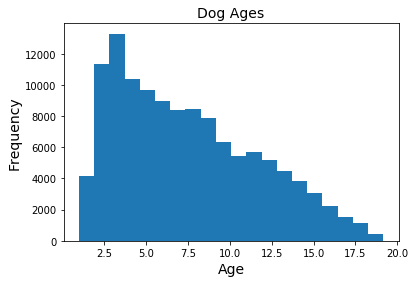

In [24]:
plt.figure(figsize=(7,5))
dogs.hist('age', bins=20, grid=False)
plt.title('Dog Ages', fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.xticks